# Import packages

In [1]:
import gc
gc.collect()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

A data set which contains xi, yi and yi is a set in itself! Because our yi’s represents tags in the questions and xi’s represents questions and a question in the Stack Overflow can have multiple tags Q1 = {t1,t2,t3,t4,…etc}.<br/>
There could be questions like<br/>
Q1 = {t1,t2,t3,t4}<br/>
Q2 = {t1,t2,t3}<br/>
Q3 = {t1,t2}<br/>
So yi is a set of classes.  
<p> So it is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas dataframe to Load the data</h3>

In [2]:
#Due to hardware limitations, I am considering only 1M records
df_train = pd.read_csv('Train.csv',nrows=1000000)


In [3]:
df_train.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


<h3> 3.1.2 Counting the number of rows </h3>

In [4]:
df_train.shape

(1000000, 4)

<h3>3.1.3 Checking for duplicates </h3>

Need to remove duplicate records for further solution. So I have updated the dataframe called and have considered only non duplicated rows.

In [5]:
dup_df_train = df_train.groupby(['Title', 'Body', 'Tags']).size().reset_index().\
    rename(columns={0:'RecordCount'})
dup_df_train.head()


,Title,Body,Tags,RecordCount
0,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
1,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1
2,Undefined symbols for architecture i386: _OB...,<p>I have imported framework for sending email...,iphone email-integration,1
3,obtaining updated locations using gps in ser...,<p>I have app in which i have two buttons <str...,android android-widget android-service,1
4,"$f$ a continuous function in [0,1], Show: $\l...","<p>Let $f$ be a continuous function in [0,1] a...",calculus,2


In [6]:
#https://appdividend.com/2019/01/24/pandas-series-value_counts-tutorial-with-example/
print("duplicate rows details:\n\n",dup_df_train['RecordCount'].value_counts())

duplicate rows details:

 1    888456
2     53832
3      1293
Name: RecordCount, dtype: int64


In [7]:
#Number of rows before removing duplicates
number_of_rows_before_removing_duplicates = df_train.shape[0]
print(number_of_rows_before_removing_duplicates)

1000000


<h3>3.1.4 Drop duplicate rows and Create new dataframe</h3>

In [8]:
df_train_no_dup=df_train.drop_duplicates(subset=['Title', 'Body', 'Tags'], inplace=False)
print("--"*10)
print("number of duplicate question: ", ((number_of_rows_before_removing_duplicates-df_train.shape[0])/number_of_rows_before_removing_duplicates)*100.0 , "%")
print("number of rows before removing duplicates: ", number_of_rows_before_removing_duplicates)
print("number of rows after removing duplicates: ", df_train_no_dup.shape[0])

--------------------
number of duplicate question:  0.0 %
number of rows before removing duplicates:  1000000
number of rows after removing duplicates:  943582


In [9]:
df_train_no_dup.shape

(943582, 4)

In [10]:
df_train_no_dup['tag_count'] = df_train_no_dup['Tags'].astype(str).apply(lambda text: len(text.split(" ")))

In [11]:
df_train_no_dup.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [12]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.

#Got this error -  ValueError: np.nan is an invalid document
# https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
tag_dtm = vectorizer.fit_transform(df_train_no_dup['Tags'].values.astype('U'))

In [13]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 943582
Number of unique tags : 34945


In [14]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each']


In [15]:
print(len(tags))

34945


<h3> 3.2.3 Number of times a tag appeared </h3>

In [16]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.A1.html
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [17]:
result

{'.a': 3,
 '.app': 11,
 '.aspxauth': 5,
 '.bash-profile': 29,
 '.class-file': 12,
 '.cs-file': 1,
 '.doc': 9,
 '.drv': 1,
 '.ds-store': 3,
 '.each': 51,
 '.emf': 8,
 '.exe': 4,
 '.hgtags': 2,
 '.htaccess': 3316,
 '.htpasswd': 6,
 '.ico': 2,
 '.lib': 3,
 '.lrc': 1,
 '.mov': 4,
 '.net': 25583,
 '.net-1.0': 2,
 '.net-1.1': 48,
 '.net-2.0': 379,
 '.net-3.0': 7,
 '.net-3.5': 832,
 '.net-4.0': 1115,
 '.net-4.0-beta-2': 3,
 '.net-4.0-rc1': 1,
 '.net-4.5': 147,
 '.net-assembly': 110,
 '.net-authorization': 2,
 '.net-cf-3.5': 10,
 '.net-client-profile': 12,
 '.net-framework': 63,
 '.net-framework-source': 5,
 '.net-framework-version': 13,
 '.net-gadgeteer': 2,
 '.net-install': 3,
 '.net-micro-framework': 22,
 '.net-reflector': 8,
 '.net-remoting': 29,
 '.net-security': 1,
 '.net-services': 3,
 '.net2.0': 3,
 '.net3.5': 8,
 '.net4.0': 7,
 '.netrc': 3,
 '.nettiers': 7,
 '.obj': 12,
 '.post': 19,
 '.procmailrc': 3,
 '.profile': 3,
 '.railsrc': 1,
 '.rdlc': 12,
 '.refresh': 1,
 '.screenrc': 1,
 '.s

In [18]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,3
1,.app,11
2,.aspxauth,5
3,.bash-profile,29
4,.class-file,12


In [19]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [20]:
tag_df_sorted.head()

,Tags,Counts
3606,c#,73028
15026,java,64770
22632,php,61712
15100,javascript,57722
1020,android,50630


<h4>Plot 'Tags' Vs 'Frequency of their appearances'</h4>

Below I have plotted the distribution of number of times tags appeared in question in descending order

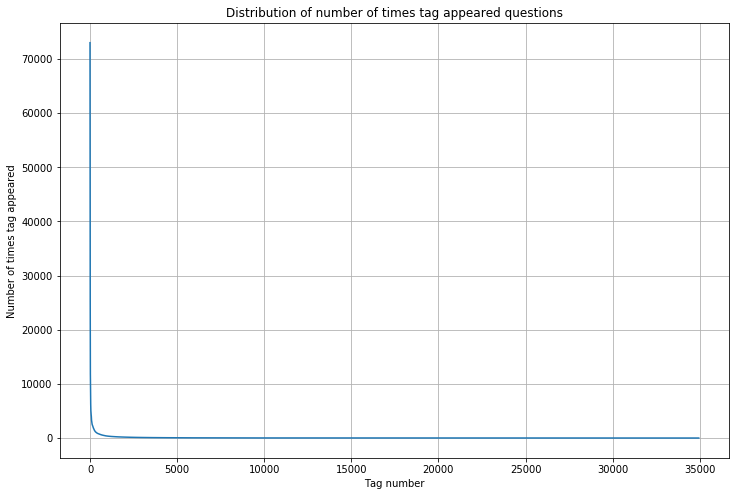

In [21]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

If we observe, the first tag occurs more than 70000 times and last tag occurs only one time. By looking at the diagram we can say that this is a <b>highly positively skewed distribution</b>. To understand better, lets <b>zoom the plot.</b>

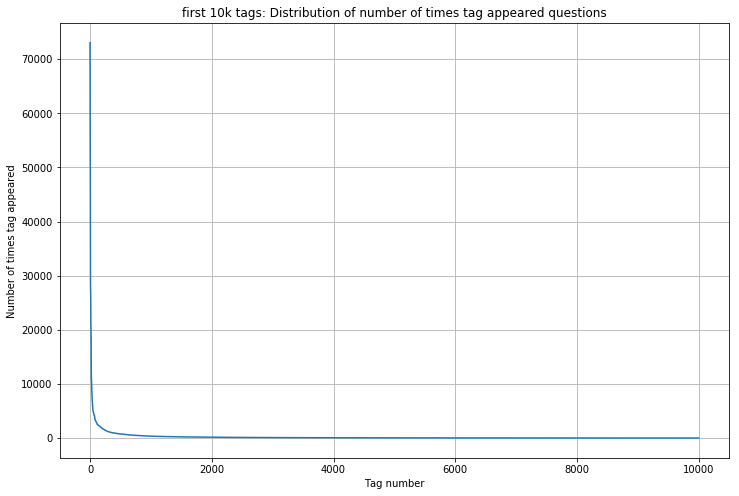

400 [73028  9656  4999  4024  2949  2483  2268  2054  1788  1658  1455  1314
  1186  1119  1031   969   926   885   832   804   767   746   711   678
   650   613   597   570   550   526   511   492   477   462   439   423
   409   395   382   371   362   354   345   335   328   319   311   306
   298   291   286   281   277   272   265   260   255   251   246   242
   236   230   225   221   216   214   211   209   206   202   199   196
   193   190   186   184   180   177   174   172   169   167   165   162
   160   158   155   153   152   149   147   145   143   140   138   137
   135   134   132   130   128   127   126   124   122   120   119   117
   116   114   113   112   111   109   108   107   105   104   102   102
   100    99    98    97    96    95    95    94    93    92    91    90
    89    88    87    86    85    84    83    82    82    81    80    79
    79    78    77    76    76    75    74    74    73    72    72    71
    70    70    69    69    68    67    67    6

In [22]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

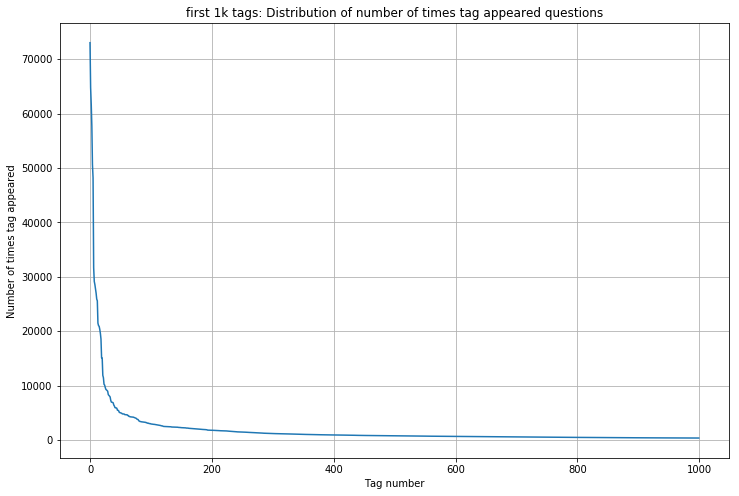

200 [73028 48180 26999 20891 15074  9656  8340  6965  6243  5476  4999  4790
  4637  4313  4211  4024  3534  3339  3270  3093  2949  2885  2781  2687
  2520  2483  2438  2378  2367  2319  2268  2235  2189  2126  2098  2054
  1985  1939  1904  1814  1788  1758  1745  1701  1674  1658  1603  1538
  1516  1477  1455  1436  1402  1373  1346  1314  1293  1249  1231  1215
  1186  1171  1155  1149  1127  1119  1101  1083  1061  1055  1031  1021
  1008  1002   987   969   962   954   945   934   926   918   908   896
   894   885   875   862   851   839   832   829   822   817   809   804
   792   786   778   774   767   762   757   750   747   746   740   734
   729   722   711   699   697   694   688   678   672   670   662   658
   650   646   639   635   632   613   611   606   605   598   597   589
   585   579   576   570   567   560   555   551   550   547   543   539
   536   526   523   519   516   514   511   509   505   499   497   492
   488   486   483   480   477   473   470   46

In [23]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

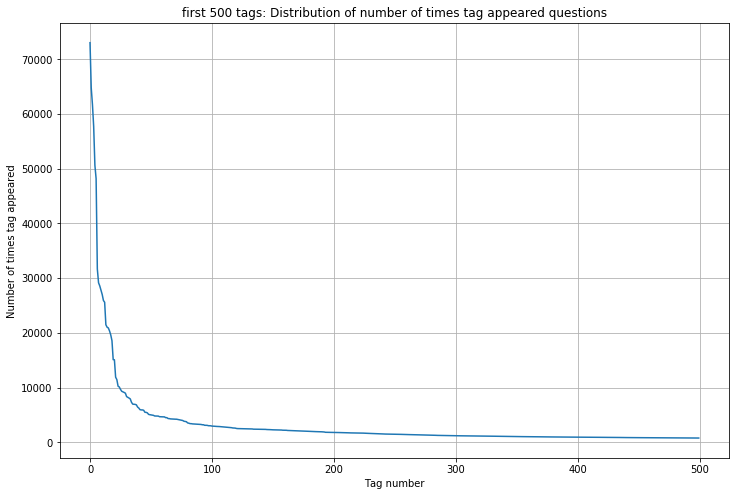

100 [73028 48180 26999 20891 15074  9656  8340  6965  6243  5476  4999  4790
  4637  4313  4211  4024  3534  3339  3270  3093  2949  2885  2781  2687
  2520  2483  2438  2378  2367  2319  2268  2235  2189  2126  2098  2054
  1985  1939  1904  1814  1788  1758  1745  1701  1674  1658  1603  1538
  1516  1477  1455  1436  1402  1373  1346  1314  1293  1249  1231  1215
  1186  1171  1155  1149  1127  1119  1101  1083  1061  1055  1031  1021
  1008  1002   987   969   962   954   945   934   926   918   908   896
   894   885   875   862   851   839   832   829   822   817   809   804
   792   786   778   774]


In [24]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

<h3>Zoom it again to find more details</h3>

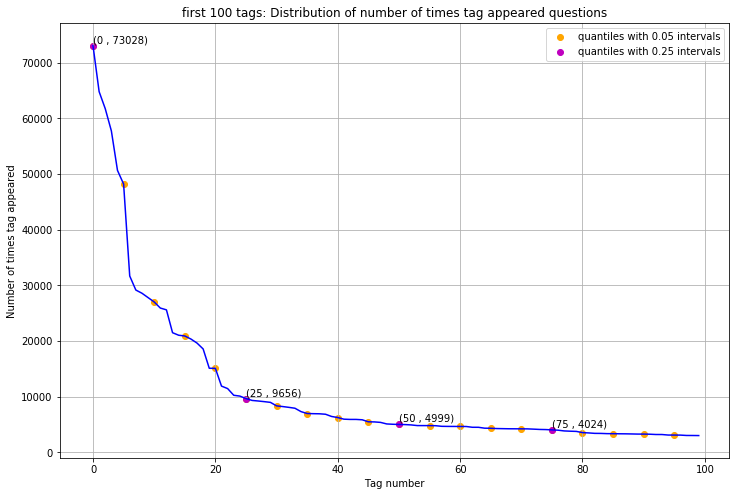

20 [73028 48180 26999 20891 15074  9656  8340  6965  6243  5476  4999  4790
  4637  4313  4211  4024  3534  3339  3270  3093]


In [25]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [26]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

25 Tags are used more than 10000 times
0 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 25 tags which are used more than 10000 times.
2. 0 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 73028 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [27]:
print( "Maximum number of tags per question: %d"%max(df_train_no_dup['tag_count']))
print( "Minimum number of tags per question: %d"%min(df_train_no_dup['tag_count']))
print( "Avg. number of tags per question: %f"% ((sum(df_train_no_dup['tag_count'])*1.0)/df_train.shape[0]))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.724856


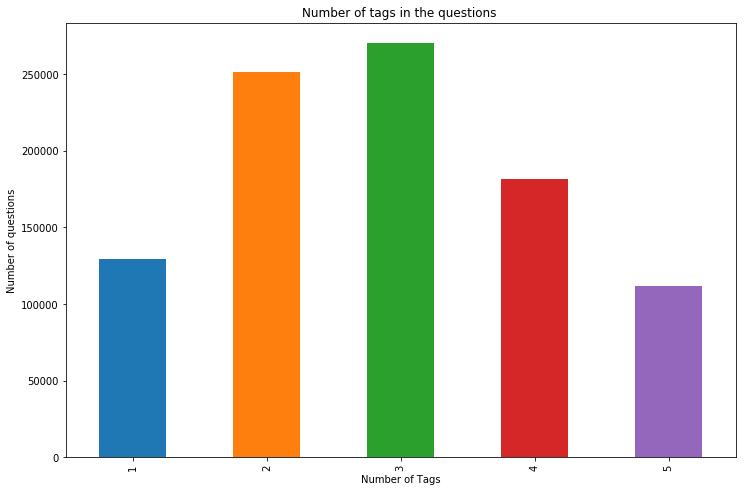

In [28]:
plt.figure(figsize=(12,8))
df_train_no_dup['tag_count'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.887779
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

<h4> If we do not consider duplicate records </h4>

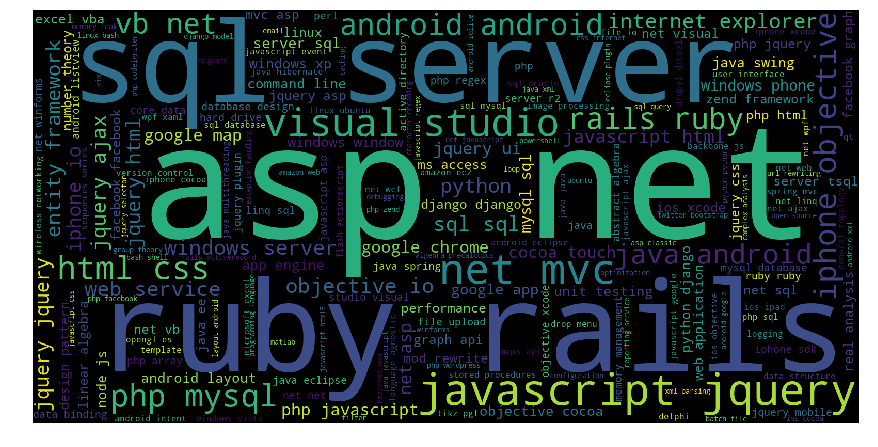

Time taken to run this cell : 0:00:17.439495


In [29]:
start = datetime.now()
frequent_tags = ' '.join(df_train_no_dup['Tags'].astype(str).values)
wordcloud = WordCloud(width=1600, height=800, margin=0).generate(frequent_tags)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.margins(x=0, y=0)
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<h4>If we consider duplicate records also </h4>

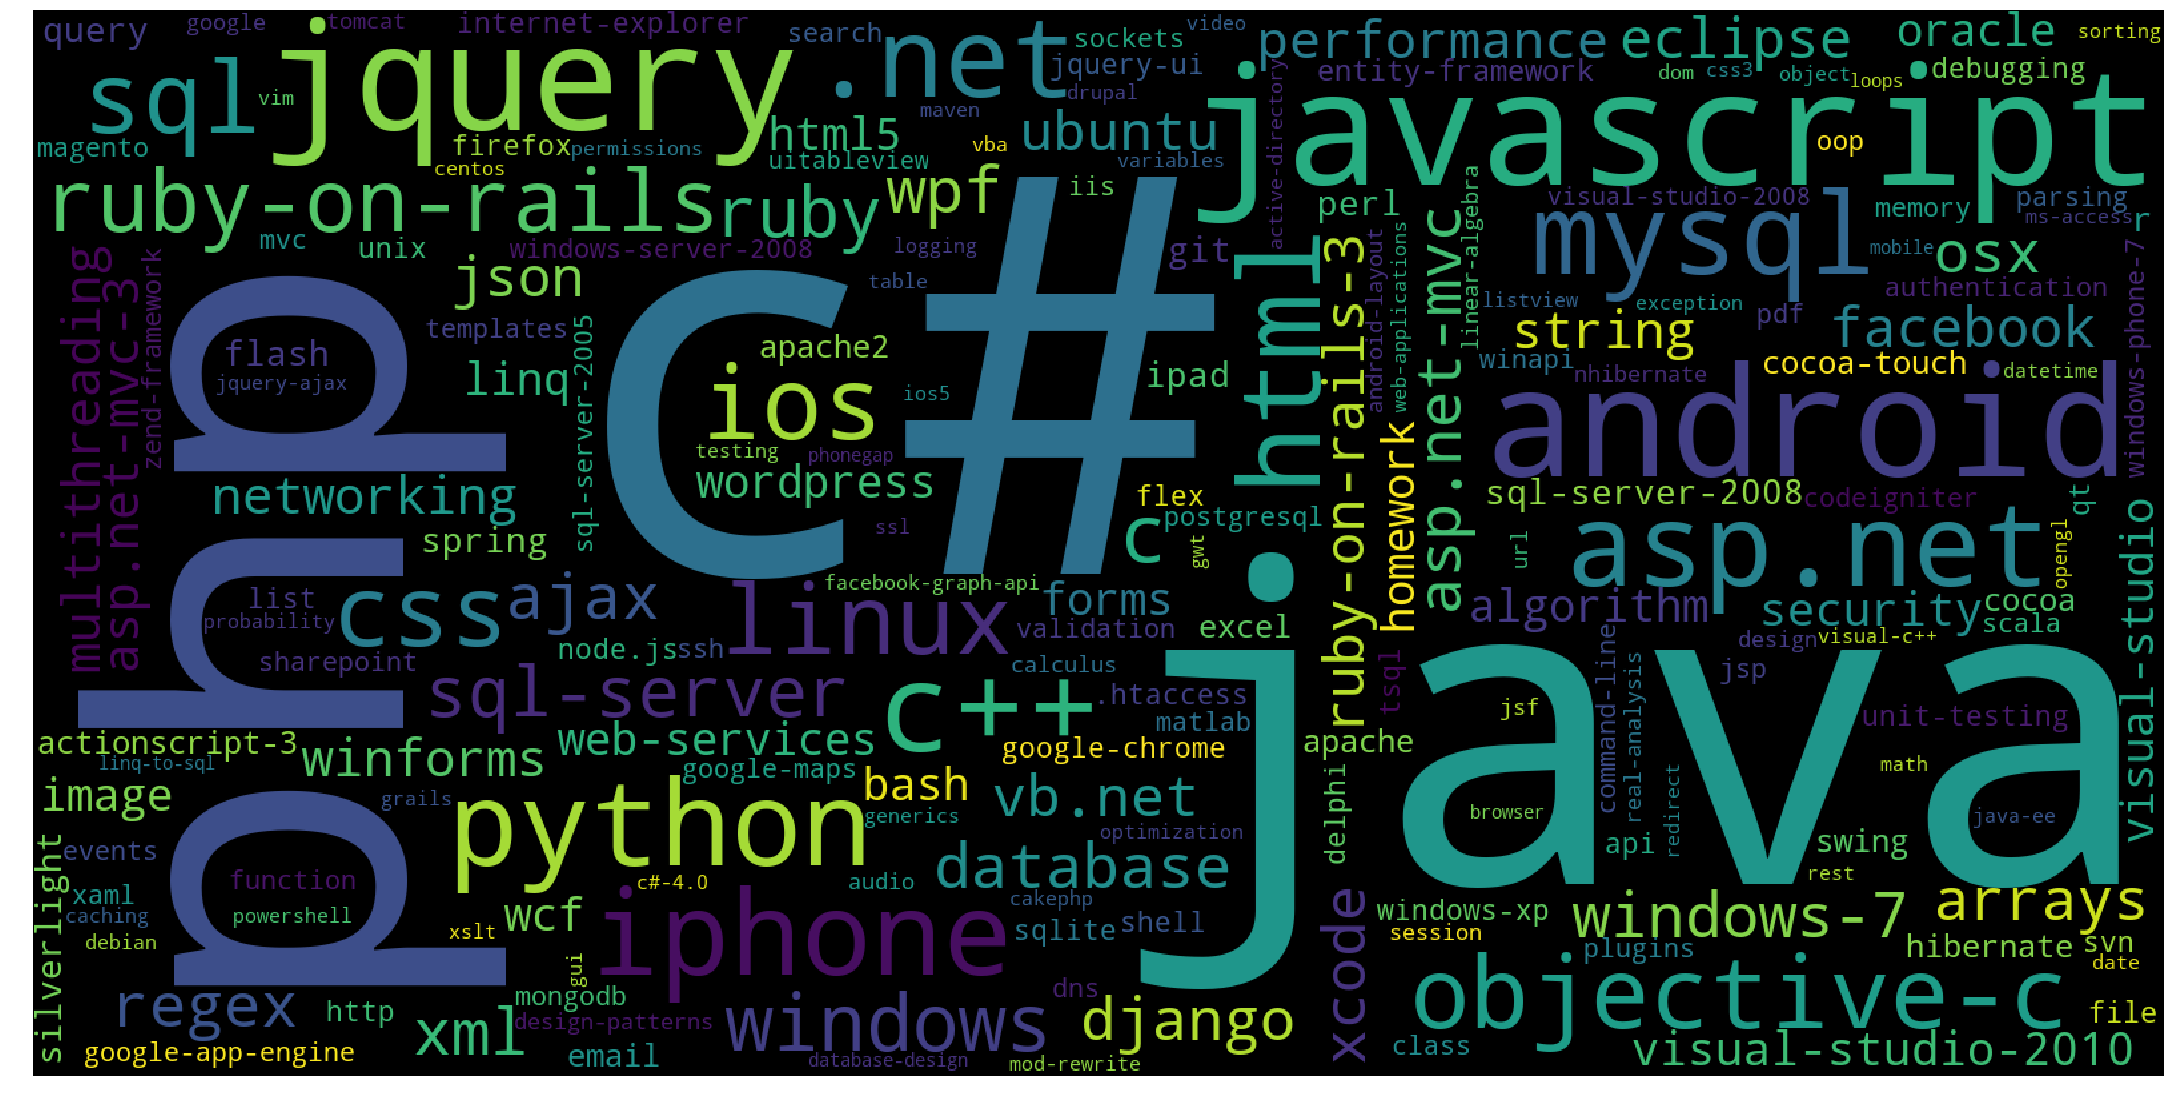

Time taken to run this cell : 0:00:04.148930


In [30]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br /><br/>
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

Fetch top 30 tag's result for review purpose

In [31]:
tag_df_sorted.head(30)

,Tags,Counts
3606,c#,73028
15026,java,64770
22632,php,61712
15100,javascript,57722
1020,android,50630
15471,jquery,48180
3615,c++,31664
24154,python,29141
14674,iphone,28567
1846,asp.net,27784


Now plot above statistics in bar chart by considering <b>top 20 tags</b>

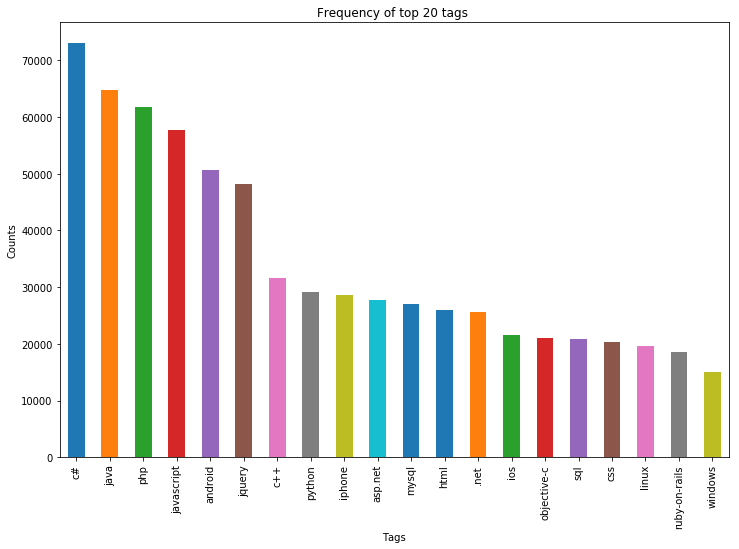

In [32]:
plt.figure(figsize=(12,8))
tag_df_sorted['Counts'].head(20).plot(kind='bar')
plt.xticks(np.arange(20), tag_df_sorted['Tags'])
plt.title("Frequency of top 20 tags ")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>


<b>P.S: Due to hardware limitations, I am considering only 500K data points</b>

In [33]:
print("shape of data before training: ", df_train_no_dup.shape)
df_train_no_dup_500k = df_train_no_dup[:500000] # Due to hardware limitations, I am considering only 500K data points
print("shape of data after training: ", df_train_no_dup_500k.shape)

shape of data before training:  (943582, 5)
shape of data after training:  (500000, 5)


In [34]:
question_containing_codes = sum(df_train_no_dup_500k['Body'].apply(lambda txt: '<code>' in txt))
print("Questions containg HTML tag 'code': ", question_containing_codes)
print("Percentage of Questions containing HTML tag 'code': {}% ".\
      format(round((question_containing_codes/df_train_no_dup_500k.shape[0])*100.0, 2)))

Questions containg HTML tag 'code':  281828
Percentage of Questions containing HTML tag 'code': 56.37% 


In [35]:
df_train_no_dup_500k.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


1. 56.37% percentage of questions contains HTML tag <code> tag. So separate out code-snippets from the Body
2. Remove Spcial characters from Question title and Body (not in code)
3. <b>Remove stop words (Except 'C')</b>
4. Remove HTML Tags
    eg. &lt;br&gt; &lt;b&gt; abcd &lt;/b&gt;&lt;/br&gt;
       Here br and b are html tags which does not says about actual class label that we need to predict.
5. Convert all the characters into small letters
6. Use SnowballStemmer to stem the words.
Stemming is the process of reducing a word to its word stem. 
eg: "python" is the stem word for the words ["python" "pythoner", "pythoning","pythoned"]
7. <b>Give more weightage to title:</b> Add title three times to the question. Title contains the information which is more specific to the question and also only after seeing the question title, a user decides whether to look into the question in detail. At least most of the users do this if not all.    
That is repeat the title 3 times in the text because tf-idf simply counts.

In [36]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

In [37]:
start = datetime.now()
processed_questions = []
questions_proccesed = 0
for index, row in df_train_no_dup_500k.iterrows():
    title, question = row['Title'], row['Body']
    #Using regular expression .Separate out code-snippets from Body eg. #include<std.io>
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    #Remove HTML Tags
    question=striphtml(question.encode('utf-8'))
    title=title.encode('utf-8')
    #Give more weight to the title.Add title three times to the question
    question=(str(title) + " " )*3+" "+str(question)
    #Remove Spcial characters from Question title and description (not in code)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    #Convert all the characters into small letters
    words=word_tokenize(str(question.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    questions_proccesed += 1
    processed_questions.append(question)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)
print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
Time taken to run this cell : 0:18:15.907248


In [38]:
print('Questions after preprocessed')
print('___'*20)
for q in processed_questions[:5]:
    print(q)
    print('____'*25)

Questions after preprocessed
____________________________________________________________
check upload file imag without mime type check upload file imag without mime type check upload file imag without mime type like check upload file imag file png jpg jpeg gif bmp anoth file problem use uploadifi upload file chang mime type give text octal someth mime type matter file type upload way check upload file imag apart check file extens use php
____________________________________________________________________________________________________
prevent firefox close press ctrl prevent firefox close press ctrl prevent firefox close press ctrl favorit editor vim regular use ctrl execut certain action quit often happen firefox activ window window still look vim think vim activ window press ctrl close firefox want way stop ctrl close firefox rene
____________________________________________________________________________________________________
error invalid type list variabl error invalid type

In [39]:
tags = df_train_no_dup_500k['Tags']
preprocessed_title_more_weight_df = pd.DataFrame({'tags':tags, 'questions': processed_questions})
preprocessed_title_more_weight_df.head()

,tags,questions
0,php image-processing file-upload upload mime-t...,check upload file imag without mime type check...
1,firefox,prevent firefox close press ctrl prevent firef...
2,r matlab machine-learning,error invalid type list variabl error invalid ...
3,c# url encoding,replac special charact url replac special char...
4,php api file-get-contents,modifi whoi contact detail modifi whoi contact...


<b>Note ::</b><br/>
From tags column we have removed all the code snippet

In [40]:
print("number of data points in sample :", preprocessed_title_more_weight_df.shape[0])
print("number of dimensions :", preprocessed_title_more_weight_df.shape[1])

number of data points in sample : 500000
number of dimensions : 2


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

We can solve Binary and Multi-Class classification problems with the help of algorithms like Logistic Regression, 
Support Vector Machines, Random Forest etc. So to solve our present Multi-Label classification we need to convert it
into a binary or a multi class classification.<br/>
Imagine we have three questions with tags,<br/>
Q1-->{t1,t2}<br/>
Q2-->{t2,t3}<br/>
Q3-->{t3,t4}<br/>

The total set of labels are 4 (t1,t2,t3,t4). So now we can convert each question into a vector of size 4.<br/>
Q1-->{t1,t2} [1|1|0|0] <br/>
Q2-->{t2,t3} [0|1|1|0]<br/>
Q3-->{t3,t4} [0|0|1|1]<br/>
             <b>Binary Vector Representation</b><br/><br/>
We can use CountVectorizer to convert all our tags into a binary vector.

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [41]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_title_more_weight_df['tags'].values.astype('U'))
print("Total number of questions: ", multilabel_y.shape[0])
print("Total number of TAGS: ", multilabel_y.shape[1])

Total number of questions:  500000
Total number of TAGS:  30645


Here we are going to use <b>Problem Transformation(Binary Relevance)</b> method to solve the problem.

<h3>Binary Relevance:</h3>

Here I am going to convert multi-label classification problem into multiple single class classification problems.For example if I am having 5 multi-label classification problem, then I need to train 5 single class classification models.
Basically in this method, I treat each label (in our case its tag) as a separate single class classification problem.

Ref :: https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

I shall sample the number of tags instead considering all of them (due to limitation of computing power)
Downscaling of data

Coming back to stackoverflow predictor problem, I need to train 30645 models literally!!! It is really huge. So I shall sample the number of tags instead considering all of them. Need to <b>down scale </b>the data.

<b> But how many tags to be sampled with the minimal information loss ? </b>

Plotting 'percentage of questions covered' Vs 'Number of tags' would help to solve this.

I shall sample the number of tags instead considering all of them (due to limitation of computing power)



Let's take <b>partial coverage</b> technique - 

Q1 -->{t1,t2,t3}
Q2 -->{t4,t5,t3}

Total tags C ={t1,t2,t3,t4,t5}
Lets take subset of tags/labels to process - (Instead of taking  30645 lables we need to take subset)<br/>
C' is strict subset of C<br/>
I want C' to be as much small as possible.<br/>
If I take C'={t1,t2} , here t1 and t2 labels are present in Q1 but t1 and t2 are absent in Q2<br/>
So I can represent Q1 with respect to C' as Q1 -->t1,t2 and Q2--> Null Set. I can remove Q2 also in that case.
Here Q1 is not completely taken care of as t3 is absent in C' but I am still ok as long as partial subset is present, I can count it. This is known as partial coverage<br/>

To find out smallest C'is to take those tags because for every tag I have count of tag i.e frequency that how many times tag occurs.<br/>
Let's take every tag has frequency(Number of time each tag is coming) like - <br/>
t1 = f1    t2=f2    t3=f3 <br/>
If we take top tags by frequency they will cover most set of questions. If t1 and t2 are most frequent tags then using that we will cover most set of questions.



In [42]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = np.argsort(t)[::-1]
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [43]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_title_more_weight_df.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

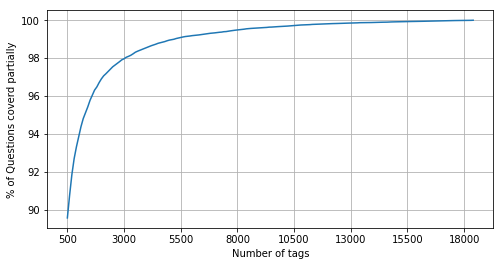

In [94]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("% of Questions coverd partially")
plt.grid()
plt.show()

In [45]:
total_tags

30645

In [46]:
tag_counts = np.arange(500, total_tags, 100)
print("with ",500,"tags we are covering ",questions_explained[list(tag_counts).index(500)],"% of questions")
print("with ",600,"tags we are covering ",questions_explained[list(tag_counts).index(600)],"% of questions")
print("with ",5500,"tags we are covering ",questions_explained[list(tag_counts).index(5500)],"% of questions")

with  500 tags we are covering  89.782 % of questions
with  600 tags we are covering  91.006 % of questions
with  5500 tags we are covering  99.053 % of questions


In [47]:
#print(*questions_explained)

In [48]:
preprocessed_title_more_weight_df.head()

,tags,questions
0,php image-processing file-upload upload mime-t...,check upload file imag without mime type check...
1,firefox,prevent firefox close press ctrl prevent firef...
2,r matlab machine-learning,error invalid type list variabl error invalid ...
3,c# url encoding,replac special charact url replac special char...
4,php api file-get-contents,modifi whoi contact detail modifi whoi contact...


<b>By using only 600 tags (2% approximately) of the total 30645 tags I am loosing only 9% of the questions & also training 600 models is reasonable . So I shall choose 600 tags.</b>

In [49]:
# we will be taking 600 tags
multilabel_yx = tags_to_choose(600)
print("number of questions that are not covered :", questions_explained_fn(600),"out of ", total_qs)

number of questions that are not covered : 44972 out of  500000


<h3>Due to memory issue downscaling the data</h3>

In [50]:
downscaled_weight_df = preprocessed_title_more_weight_df[:100000]
print(downscaled_weight_df.shape)

(100000, 2)


In [51]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(downscaled_weight_df['tags'].values.astype('U'))
print("Total number of questions: ", multilabel_y.shape[0])
print("Total number of TAGS: ", multilabel_y.shape[1])

Total number of questions:  100000
Total number of TAGS:  18487


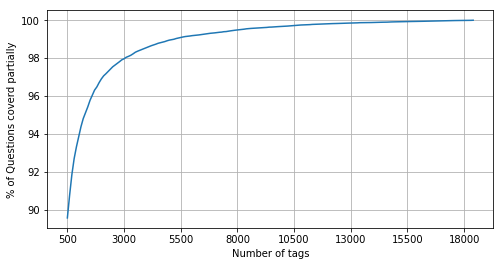

In [95]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=downscaled_weight_df.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))


fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("% of Questions coverd partially")
plt.grid()
plt.show()    

In [60]:
tag_counts = np.arange(500, total_tags, 100)
print("with ",500,"tags we are covering ",questions_explained[list(tag_counts).index(500)],"% of questions")
print("with ",600,"tags we are covering ",questions_explained[list(tag_counts).index(600)],"% of questions")
print("with ",5500,"tags we are covering ",questions_explained[list(tag_counts).index(5500)],"% of questions")

with  500 tags we are covering  89.566 % of questions
with  600 tags we are covering  90.775 % of questions
with  5500 tags we are covering  99.088 % of questions


<b>By using only 600 tags (2% approximately) of the total 18487 tags I am loosing only 1.845% of the questions & also training 600 models is reasonable . So I shall choose 600 tags.</b>

In [53]:
# we will be taking 600 tags
multilabel_yx = tags_to_choose(600)
print("number of questions that are not covered :", questions_explained_fn(600),"out of ", total_qs)

number of questions that are not covered : 9225 out of  500000


__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

<h1>4.2 Split the data into test and train (80:20) </h1>

Since the data is not of temporal nature (i.e., no timestamp associated with the question when it was asked. If it was there I would have taken oldest 80% as train and latest 20% as test dataset), we are splitting data randomly into 80% train set & 20% test set.

In [62]:
total_size=downscaled_weight_df.shape[0]
train_size=int(0.80*total_size)

x_train=downscaled_weight_df.head(train_size)
x_test=downscaled_weight_df.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [63]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (80000, 600)
Number of data points in test data : (20000, 600)


<h2>4.3 Featurizing data </h2>

Now let’s do the Featurization of the data.

<b>Bag of Words (BoW)</b> is an algorithm that counts how many times a word appears in a document.The BoW model is a perfectly acceptable model to convert raw text to numbers. However, if our purpose is to identify signature words in a document, then tf-idf work better.<br/>
<b>Term frequency (tf)</b> is basically the output of the BoW model. For a specific document, it determines how important a word is by looking at how frequently it appears in the document.<br/>
<b> Inverse Document Frequency (idf) </b>For a word to be considered a signature word of a document, it shouldn’t appear that often in the other documents. Thus, a signature word’s document frequency must be low, meaning its inverse document frequency must be high.

With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency.



<h3>4.3.1 Featurizing question data with TfIdf vectorizer upto 1,2 and3 grams.</h3>

We have questions and we havetags corensponding to those questions. We have converted these tags into a binary vector of yi.
Here questions are of mostly text data which has title and body. We have removed code part of the body an also we have preprocessed it by removing stop words, html tags and stemmring.

So if I calculate tfidf my questions can be represent as tfidf vector and my tags are again a binary vector.

Questions are text data and Term Frequency Inverse Document Frequency [TFIDF] is the best technique to represent text data. So I apply TFIDF with max_feature= 200000 and considering only unigrams,bi-grams and tri-grams.

In [64]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:06.976220


In [65]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (80000, 91417) Y : (80000, 600)
Dimensions of test data X: (20000, 91417) Y: (20000, 600)


<b>Note :: </b><br/>
Here, xi is a tf-idf vecor of size 91417 and 80000 such points in my training data.

yi is a binary vector of size 600 because we choose 600 tags.

The tf-idf vector is a sparse vector.

<h3>4.3.2 Featurizing question data with Count Vectorizer(Bag of Words).</h3>

<b>Converting String tags to multilable output variables</b>

In [74]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features=200000,  \
                             tokenizer = lambda x: x.split(),  ngram_range=(1,2))

x_train_multilabel_CV = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel_CV = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:22.680322


In [75]:
print("Dimensions of train data X:",x_train_multilabel_CV.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel_CV.shape,"Y:",y_test.shape)

Dimensions of train data X: (80000, 83285) Y : (80000, 600)
Dimensions of test data X: (20000, 83285) Y: (20000, 600)


<h2> 4.4 Logistic Regression with OneVsRestClassifier using Tfidf vectorizer </h2>

<h3>4.4.1 </h3>

Since we have high dimensional data (600 tags or labels and 100K record however which is small for lage system) we need to 600 binary models for this. Logistic regression has OneVsRestClassifier. OneVsRest takes each of the 600 labels and train 600 Logistic Regression models.

<br/> Training Logistic Regression model is cheap comparatively to other complex models like GBDT, RF, SVM. Cheapness of very high dimensional data. 
<br/>Since we have highdimensional data Logistic regression is cheap compared to Linera SVM model.
<br/>I am going to train OneVsRestClassifier with SGDClassifier with log loss. <b>SGDClassifier with log loss is Logistic Regression.</b> 
<br/>I have not done much hyper parameter tuning. Considering alpha as 0.00001

OneVsRest can be used for both multiclass and multilabel. OneVsRest can be used for multilabel setting just class label it has becomes a vector excpet everything is same.

I have set n_jobs=-1 which means I am parallelizing the job. It should take as much core available in the my machine.

In [66]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
#print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.22165
macro f1 score : 0.3278048410455833
micro f1 scoore : 0.46904172911287273
hamming loss : 0.0024504166666666667


D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



<b>Note::</b>

Micro f1 score(0.469..) is important even though we are calculating macro f1 score,hamming loss.


In [67]:
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers
Precision: 0.7162, Recall: 0.3487, F1-measure: 0.4690
Macro-average quality numbers
Precision: 0.5201, Recall: 0.2588, F1-measure: 0.3278
             precision    recall  f1-score   support

          0       0.62      0.25      0.36      1567
          1       0.79      0.45      0.58      1338
          2       0.84      0.57      0.68      1326
          3       0.77      0.46      0.57      1261
          4       0.96      0.76      0.85      1040
          5       0.89      0.64      0.74      1015
          6       0.68      0.31      0.43       657
          7       0.89      0.65      0.76       625
          8       0.71      0.40      0.52       591
          9       0.76      0.41      0.53       606
         10       0.88      0.63      0.73       547
         11       0.53      0.19      0.28       527
         12       0.65      0.15      0.25       556
         13       0.57      0.24      0.34       446
         14       0.65      0.32    

D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



<b> Note ::</b>

We have printed precision and recall also. For class 0 precision( 0.62) is very good but recall is slightly low.
You can see precision is pretty high but recalls are not that high compared to precision except few casess like class/tag 4 0.96 (precision) and 0.76(recall). But ideally we want high precision and high recall value.


<h3>4.4.2</h3>

I am going to train OneVsRestClassifier with proper LogisticRegression with penalty(regularization) l1 with parallalization.

l1 regularization works well when we have sparse data and when we have lots of feature.

I have set n_jobs=-1 which means I am parallelizing the job. It should take as much core available in the my machine.


In [68]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))
print("macro f1 score :",metrics.f1_score(y_test, predictions_2, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions_2, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions_2))
#print("Precision recall report :\n",metrics.classification_report(y_test, predictions_2))



Accuracy : 0.22335
Hamming loss  0.0024585833333333335
macro f1 score : 0.33893978485149223
micro f1 scoore : 0.4711112704587419
hamming loss : 0.0024585833333333335


D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<b>Note ::</b>
        
micro f1 scoore( 0.471...) is better compared to previous one which is 0.469..        

In [69]:
precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers
Precision: 0.7089, Recall: 0.3528, F1-measure: 0.4711
Macro-average quality numbers
Precision: 0.5248, Recall: 0.2706, F1-measure: 0.3389
             precision    recall  f1-score   support

          0       0.63      0.25      0.36      1567
          1       0.80      0.44      0.57      1338
          2       0.84      0.56      0.67      1326
          3       0.78      0.44      0.57      1261
          4       0.96      0.77      0.85      1040
          5       0.88      0.64      0.74      1015
          6       0.70      0.31      0.43       657
          7       0.90      0.66      0.76       625
          8       0.70      0.41      0.52       591
          9       0.76      0.39      0.52       606
         10       0.87      0.62      0.73       547
         11       0.52      0.19      0.28       527
         12       0.65      0.15      0.25       556
         13       0.54      0.24      0.33       446
         14       0.61      0.33    

D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h2> 4.5 SGDClassifier with OneVsRestClassifier using Count vectorizer(Bag Of Words) </h2>


In [76]:
alphas = [10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]

<h3>4.5.1 Using Log loss</h3>


The optimal value of alpha is 0.


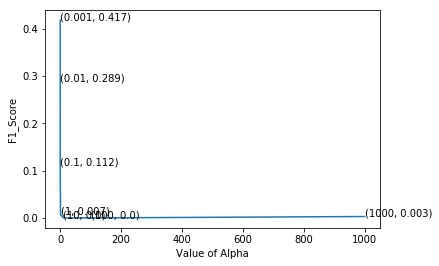

F1_score for each alpha value is :  [0.417 0.289 0.112 0.007 0.    0.    0.003]


In [77]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in alphas:  #alp = k
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=a, penalty='l2'))

    scores = cross_val_score(classifier, x_train_multilabel_CV, y_train, cv=2, scoring='f1_micro')
    cv_scores.append(scores.mean())

f_score = [x for x in cv_scores]

# determining best alpha
optimal_alpha = alphas[f_score.index(max(f_score))]
print('\nThe optimal value of alpha is %d.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(alphas, f_score)

for xy in zip(alphas, np.round(f_score,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Value of Alpha')
plt.ylabel('F1_Score')
plt.show()

print("F1_score for each alpha value is : ", np.round(f_score,3))

Observation: F1 score is highest for alpha = 0.001

In [78]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.001, penalty='l1'), n_jobs=1)
classifier.fit(x_train_multilabel_CV, y_train)
predictions = classifier.predict (x_test_multilabel_CV)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.158
Hamming loss  0.00300775
Micro-average quality numbers
Precision: 0.5224, Recall: 0.3605, F1-measure: 0.4266
Time taken to run this cell : 0:08:17.024258


<h3>4.5.2 Using Hinge loss</h3>

In [79]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.001, penalty='l1'), n_jobs=1)
classifier.fit(x_train_multilabel_CV, y_train)
predictions = classifier.predict (x_test_multilabel_CV)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.15085
Hamming loss  0.003052416666666667
Micro-average quality numbers
Precision: 0.5121, Recall: 0.3492, F1-measure: 0.4153
Time taken to run this cell : 0:05:32.599905


<h2>4.6 Performance Table</h2>

In [102]:
from prettytable import PrettyTable
x = PrettyTable()
x.title = 'Overall Observation'
x.field_names = ["Serial No","Model","Featurization", "alpha",'Loss','Micro F1 Score']

In [103]:
x.add_row(['1', 'OneVsRest + SGD Classifier', "Tf-idf",0.00001,"log",0.4690])
x.add_row(['2', 'OneVsRest + Logistic Classifier', "Tf-idf","","",0.4711])
x.add_row(['3', 'OneVsRest + SGD Classifier', "Bag-of-words",0.001,"log",0.4266])
x.add_row(['4', 'OneVsRest + SGD Classifier', "Bag-of-words",0.001,"hinge",0.4153])

In [104]:
print(x)

+----------------------------------------------------------------------------------------------+
|                                     Overall Observation                                      |
+-----------+---------------------------------+---------------+-------+-------+----------------+
| Serial No |              Model              | Featurization | alpha |  Loss | Micro F1 Score |
+-----------+---------------------------------+---------------+-------+-------+----------------+
|     1     |    OneVsRest + SGD Classifier   |     Tf-idf    | 1e-05 |  log  |     0.469      |
|     2     | OneVsRest + Logistic Classifier |     Tf-idf    |       |       |     0.4711     |
|     3     |    OneVsRest + SGD Classifier   |  Bag-of-words | 0.001 |  log  |     0.4266     |
|     4     |    OneVsRest + SGD Classifier   |  Bag-of-words | 0.001 | hinge |     0.4153     |
+-----------+---------------------------------+---------------+-------+-------+----------------+


<h2>Conclusion:</h2>
<ul>
    
<li>We have choosen 'f1_micro' scoring metric because of the stated business statement.</li><br/>

<li>Used bag of words upto 2 grams instead of higher number due to memory issue and Tfidf upto 3 grams.</li>

<li>
    <h4>I have taken simplest model like Logistic Regression and SGDClassifier eventhough OneVsRest can take any model like RF,SVM and GBDT mostly because </h4><br/>
    <b>High dimentional data:</b> Since we are converting text to TfIdf or BOW vectors, the dimensions we get are very large in size. And when the dimensions are large linear model works very well but typically RF, SVM & GBDT won't work well.</b>
In linear model we can consider Logistic Regression and Linear SVM. But Linerar SVM has problem with time complexity as mentioned in the 2nd point below.    
    <br/>
    <b>Too many models to train:</b> We have literally 600 models to train (after downscaling of data). And Logistic Regression is the simplest model one can use & it is comparitively faster.We can try with Linear SVM with SGD Classifier and hinge loss but performance will be similar Logistic Regression. If we start using other models like GBDT or RF, it will take too much time to train the model. </li><br/>

<li>We can see in the performance table that Logistic Regression with Tfidf vectorizer works better than SGDClassifier.</li>
</ul>

<h2>Enhancements:</h2>
1. To try with more data points (on a system more than 8GB RAM & highend processor)


2. Featurizing Text Data with Word2Vec: When you try Word2Vec, the dimentionality of data reduces & hence complex models like Random Forests or GBDT might work well


3. Try using scikit-multilearn library. Please note that this library doesn't take sparse matrix as input, you need to give dense matrix as input.So obviously you need to have more RAM to use this library